In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tkinter import filedialog
from tkinter import Tk

---
# **Importando uma base de dados**

In [77]:
# Seleciona um arquivo
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Escolha um arquivo CSV", filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))) #Tipo de arquivo

if file_path:
    df = pd.read_csv(file_path, sep=';') #Sempre verificar o separador
    print(f"Arquivo '{file_path}' carregado com sucesso!")
else:
    print("Nenhum arquivo selecionado.")

Arquivo 'D:/GitHub/ml-playground/EDA/em_andamento/NIVEA_DATASET.csv' carregado com sucesso!


---
# **Visualizando os Dados**

In [78]:
df.head(10)

,PRODUTO,CATEGORIA
0,NIVEA SUAVE SAB INT,Nivea
1,DES NIVEA SENSITIVE,Nivea
2,CR NIVEA 145G,Nivea
3,NIVEA SUAVE SAB INT,Nivea
4,BRINDE NIVEA NECESSAIRE Q10,Nivea
5,19373 - DROPS FREEGELLS MENTA,SNACK
6,19373 - LENCO UMED PAMPERS LAVANDA C/,FRALDA
7,A navalha de Ockham: O principio filosofico qu...,LIVRO
8,ABACATE GNEL kg,COMIDA
9,ABOVE DES CARBON 150M,COMIDA


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PRODUTO    2150 non-null   object
 1   CATEGORIA  2150 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB


In [80]:
df.tail(10)

,PRODUTO,CATEGORIA
2140,NFC CELLULAR LUMINOUS630 SERUM 30ML Lote:2384...,Nivea
2141,SERUM FACIAL NIVEA LUMINOUS 630,Nivea
2142,NIVEA Uniformizador Facial Cellular Luminous 6...,Nivea
2143,NIVEA CEL LUM DIA 40ML,Nivea
2144,NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...,Nivea
2145,NIVEA Uniformizador Facial Cellular Luminous 6...,Nivea
2146,NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS Lote...,Nivea
2147,NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...,Nivea
2148,SERUM FACIAL NIVEA LUMINOUS 630,Nivea
2149,NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS 15ML,Nivea


In [81]:
linhas, colunas = df.shape
print(f"Linhas: {linhas:,}\nColunas:{colunas:,}")

Linhas: 2,150
Colunas:2


---
# **Data Preparation**

- Alterar nomes de colunas
- Verificar se os tipos de cada variável estão corretos

Os nomes das features estão corretos e o tipo de cada um está de acordo

In [84]:
df = df.rename(columns=lambda x: x.strip().lower())
print(df)

                                                produto categoria
0                                   NIVEA SUAVE SAB INT     Nivea
1                                   DES NIVEA SENSITIVE     Nivea
2                                         CR NIVEA 145G     Nivea
3                                   NIVEA SUAVE SAB INT     Nivea
4                           BRINDE NIVEA NECESSAIRE Q10     Nivea
...                                                 ...       ...
2145  NIVEA Uniformizador Facial Cellular Luminous 6...     Nivea
2146  NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS  Lote...     Nivea
2147  NIVEA CELLULAR LUMINOUS 630 ANTISPOT ANTIOLHEI...     Nivea
2148                    SERUM FACIAL NIVEA LUMINOUS 630     Nivea
2149      NIVEA PREENCHEDOR Q10 EXPERT ANTISSINAIS 15ML     Nivea

[2150 rows x 2 columns]


---
# **EDA**

**1. Verificando os tipos de dados**

In [85]:
contagem_tipos = df.dtypes.value_counts().to_dict()
resumo = ", ".join([f"{contagem} colunas do tipo {tipo}" for tipo, contagem in contagem_tipos.items()])
print(resumo)

2 colunas do tipo object


In [86]:
print("Mais detalhes sobre as colunas:\n")

informacoes_colunas = pd.DataFrame({
    'Tipo de Dado': df.dtypes,
    'Contagem nao nulos': df.count(),
    'Contagem nulos': df.isnull().sum(),
    'Porcentagem nulos': (df.isnull().sum() / len(df) * 100).round(2),
    'Valores unicos': df.nunique(),
    'Porcentagem cardinalidade' : (df.nunique() / len(df) *100).round(2)
})

print(informacoes_colunas)


Mais detalhes sobre as colunas:

          Tipo de Dado  Contagem nao nulos  Contagem nulos  Porcentagem nulos  \
produto         object                2150               0                0.0   
categoria       object                2150               0                0.0   

           Valores unicos  Porcentagem cardinalidade  
produto               870                      40.47  
categoria              12                       0.56  


In [87]:
porcentagem_nulos_alta = informacoes_colunas[informacoes_colunas['Porcentagem nulos'] > 25].index.tolist() # Porcentagem de valores Nulos
if porcentagem_nulos_alta:
    print(f"Colunas com altas taxas de valores nulos: {', '.join(porcentagem_nulos_alta)}")

else:
    print("Não foi identificado altas taxas de valores nulos!")

Não foi identificado altas taxas de valores nulos!


In [88]:
valor_unico = informacoes_colunas[informacoes_colunas['Valores unicos'] == 1].index.tolist()
if valor_unico:
    print(f"Colunas com um único valor: {', '.join(valor_unico)}")
else:
    print("Não foi identificado valores únicos!")

Não foi identificado valores únicos!


In [89]:
porcentagem_cardinalidade_alta = informacoes_colunas[informacoes_colunas['Porcentagem cardinalidade'] > 90].index.tolist()
if porcentagem_cardinalidade_alta:
    print(f"Colunas com altas taxas de cardinalidade: {', '.join(porcentagem_cardinalidade_alta)}")
else:
    print("Não foi identificado altas taxas de cardinalidade!")

Não foi identificado altas taxas de cardinalidade!


---
**2. Analizando os valores nulos**

In [90]:
total_celulas = np.prod(df.shape)
total_nulos = df.isnull().sum().sum()
porcentagem_nulos = (total_nulos/total_celulas) * 100

print(f"Visão geral: {total_nulos} valores nulos de {total_celulas} células, sendo {porcentagem_nulos:.2f}% do total.")

Visão geral: 0 valores nulos de 4300 células, sendo 0.00% do total.


In [91]:
if total_nulos > 0:
    #plotar um gráfico de nulos
    plt.figure(figsize=(12,6))
    ax = sns.heatmap(df.isnull(), cbar = False, cmap = "viridis", yticklabels = False)
    plt.title("Mapa de Valores nulos")
    plt.tight_layout()
    plt.show()

    colunas_nulos = df.columns[df.isnull().any()].tolist()
    print(f"Colunas com dados nulos: {', '.join(colunas_nulos)}")

    dados_nulos = pd.DataFrame({
        'Contagem de nulos': df.isnull().sum(),
        'Porcentagem de nulos': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Porcentagem de nulos', ascending=False)

    dados_nulos = dados_nulos[dados_nulos['Contagem de nulos'] > 0]

    plt.figure(figsize = (12,6))
    ax = dados_nulos['Porcentagem de nulos'].plot(kind='bar')
    plt.title('Porcentagem de valores nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Porcentagem de nulos')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    display(dados_nulos)

else:
    print(f"Não foram encontrados valores nulos!")

Não foram encontrados valores nulos!


---
**3. Verificando se existe registros duplicados**

In [92]:
contagem_duplicados =  df.duplicated().sum()

if contagem_duplicados > 0:
    porcentagem_duplicados = (contagem_duplicados / len(df)) * 100
    print(f"Foi encontrado {contagem_duplicados} registros duplicados, o que corresponde a {porcentagem_duplicados:.2f} do total de registros")
else: 
    print("Não foi encontrado registros duplicados no dataset.")

Foi encontrado 1270 registros duplicados, o que corresponde a 59.07 do total de registros


Isso é um belo de um problemas, pois pode causar overfitting quando for treinar o modelo

In [93]:
# Encontrar duplicatas com base em todas as colunas
duplicados = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

print("🌸 Registros Duplicados 🌸")
print(duplicados.to_string(index=False))

🌸 Registros Duplicados 🌸
                                                                                                                 produto categoria
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                                     BODY HIDR PER RENOV ANTIC  Lote:31022733  :SEM GTIN    OUTROS
                                                          

In [94]:
df_com_duplicados = df
df = df.drop_duplicates()

In [95]:
duplicados = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

print("🌸 Registros Duplicados 🌸")
print(duplicados.to_string(index=False))

🌸 Registros Duplicados 🌸
Empty DataFrame
Columns: [produto, categoria]
Index: []


---
**4. Inferindo tipos de dados**

In [96]:
def inferir_tipos_colunas(df):
    col_numericas = []
    col_categorias = []
    col_datetime = []
    col_text = []
    col_id = []

    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            col_datetime.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if("id" in col.lower() or col.lower().endswith("_id") and df[col].nunique() > 0.8 *len(df)):
                col_id.append(col)
            else: 
                col_numericas.append(col)
        elif pd.api.types.is_object_dtype(df[col]):
            amostra = df[col].dropna().sample(min(10, len(df[col].dropna()))).astype(str)
            avg_len = amostra.str.len().mean()
            max_len = amostra.str.len().max()
            unique_ratio = df[col].nunique() / len(df[col].dropna())
            if ('id' in col.lower() or col.lower().endswith('_id')) and unique_ratio > 0.8:
                    col_id.append(col)
            elif avg_len > 50 or (max_len > 100 and unique_ratio > 0.9):
                col_text.append(col)
            else:
                col_categorias.append(col)

    return {
        'numerica': col_numericas,
        'categorica': col_categorias,
        'datetime': col_datetime,
        'textual': col_text,
        'id': col_id
    }

tipos_colunas = inferir_tipos_colunas(df)
for tipo, cols in tipos_colunas.items():
    if cols:
        print(f"Coluna {tipo.capitalize()} ({len(cols)}): {', '.join(cols)}")

Coluna Categorica (1): categoria
Coluna Textual (1): produto


---
**5. Verificando inconsistências ou possíveis problemas**

In [97]:
def verificar_consistencia_dados(df):
    problemas = []

    for col in tipos_colunas['numerica']:
        if df[col].dtype in [np.int64, np.int32, np.float64, np.float32]:
            if df[col].isnull().sum() > 0.5 * len(df):
                continue
            # verifica outliers usando o método IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            porcentagem_outliers = len(outliers) / len(df) * 100
        
            if porcentagem_outliers > 5:
                problemas.append(f"Coluna '{col}' tem {porcentagem_outliers:.2f}% de possíveis outliers\nLimite: {limite_inferior:.2f} a {limite_superior:.2f}" )

            indicadores_quantidade = ['qtd', 'quantidade', 'preco', 'ano', 'peso', 'altura'] #alguns indicadores
            if any(indicador in col.lower() for indicador in indicadores_quantidade):
                valores_negativos = (df[col] < 0).sum()
                if valores_negativos > 0:
                    problemas.append(f"Coluna '{col}' contém {valores_negativos} valores negativos")
    
    for col in tipos_colunas['categorica']:
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
            
        if df[col].nunique() > 1:
            qtd_valores = df[col].value_counts()
            valores_raros = qtd_valores[qtd_valores < len(df) * 0.01]
            if len(valores_raros) > 0 and len(valores_raros) < 0.5 * df[col].nunique():
                problemas.append(f"A coluna '{col}' tem {len(valores_raros)} categoria(s) raras (cada uma com menos de 1% dos dados), que talvez precisem ser agrupadas.")

        if df[col].dtype == object:
            valores = df[col].dropna().astype(str)
            valores_baixos = valores.str.lower()
            casos_duplicados = valores_baixos.value_counts()[valores_baixos.value_counts() > 1].index
            if len(casos_duplicados) > 0:
                problemas_amostra = []
                for valor in casos_duplicados[:3]:
                    variacoes = valores[valores_baixos == valor].unique()
                    if len(variacoes) > 1:
                        problemas_amostra.append(f"'{variacoes[0]}' x '{variacoes[1]}'")
                if problemas_amostra:
                    problemas.append(f"A coluna '{col}' possui inconsistências, como: {', '.join(problemas_amostra)}")

    for col in tipos_colunas['datetime']:
        if pd.Timestamp.now() < df[col].max():
            futuro = (df[col] > pd.Timestamp.now()).sum()
            if futuro > 0:
                problemas.append(f"A coluna '{col}' contém {futuro} datas no futuro, isso pode indicar erros nas datas.")

    return problemas

problemas = verificar_consistencia_dados(df)

if problemas:
    print("Existem potenciais PROBLEMAS!\n")
    for i, problema in enumerate(problemas, 1):
        print(f"{i}. {problema}\n")
else: 
    print("Não foram identificados possíveis problemas")

Não foram identificados possíveis problemas


---
**6. Variaveis Numéricas**

In [98]:
if tipos_colunas['numerica']:
    estatisticas = df[tipos_colunas['numerica']].describe().T
    estatisticas['range'] = estatisticas['max'] - estatisticas['min']
    estatisticas['coeficiente_variacao'] = (estatisticas['std']/estatisticas['mean'] *100).round(2)
    estatisticas = estatisticas.sort_values('coeficiente_variacao', ascending = False)

    print("Resumo estatístico das colunas Numéricas")
    display(estatisticas)

    #Identificando variáveis com altas variações
    if len(estatisticas) > 0:
        colunas_alta_variacao = estatisticas.nlargest(min(3, len(estatisticas)), 'coeficiente_variacao').index.tolist()
        print(f"Colunas Numericas com variações altas:  {', '.join(colunas_alta_variacao)}")

else:
    print("Não foi identificado variaveis numéricas no dataset!")

Não foi identificado variaveis numéricas no dataset!


- Plotando essas Variações

In [99]:
colunas_numericas = min(len(tipos_colunas['numerica']), 16)

if colunas_numericas > 0:
    colunas_plot = tipos_colunas['numerica'][:colunas_numericas]
    n_colunas = min(3, colunas_numericas)
    n_linhas = (colunas_numericas + n_colunas -1)//n_colunas

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize = (15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes]) 
        axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(f"Distribuicao de {col}")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)   

    plt.tight_layout()
    plt.show() 

    #identificar outliers

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.boxplot(x=df[col].dropna(), ax=ax)
        ax.set_title(f'Boxplot de {col}')
        ax.set_xlabel(col)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()       

else: 
     print("Não foi identificado variaveis numéricas no dataset!")

Não foi identificado variaveis numéricas no dataset!


---
**7. Variáveis Categóricas**

Top valores da coluna 'categoria' (entre 12 valores diferentes)


,Frequência,Porcentagem
categoria,,
Nivea,560,63.64
OUTROS,290,32.95
COMIDA,8,0.91
WELLA,7,0.80
NATURA,4,0.45
J&J,4,0.45
USO_PESSOAL,2,0.23
SNACK,1,0.11
LIVRO,1,0.11


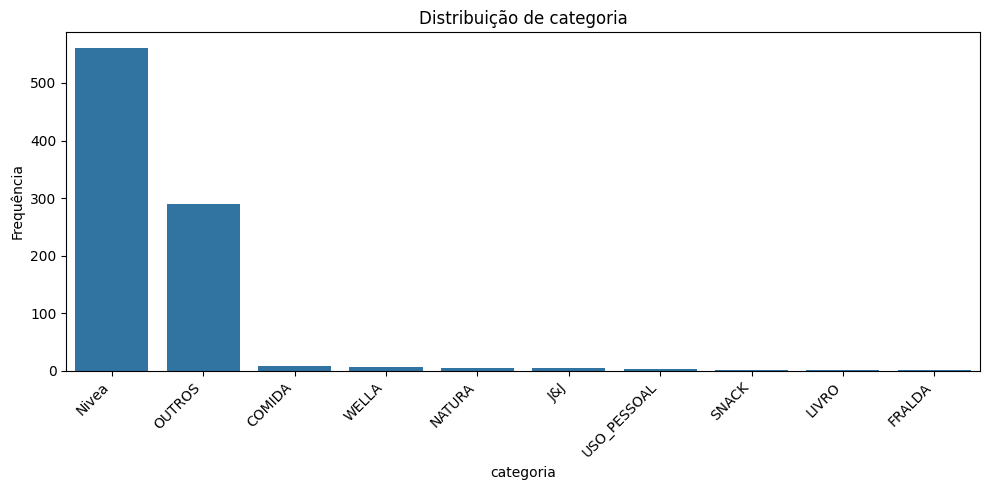

In [100]:
if tipos_colunas['categorica']:
    for col in tipos_colunas['categorica'][:min(10, len(tipos_colunas['categorica']))]:
        if df[col].nunique() > 50 or df[col].isnull().sum() > 0.5 * len(df):  # categorias demais ou mais de 50% nulos
            print(f"A coluna '{col}' possui muitas categorias ou valores nulos para uma análise.\n")
            continue

        c_vezes = df[col].value_counts().head(10)
        c_porcentagem = (c_vezes / len(df) * 100).round(2)
        print(f"Top valores da coluna '{col}' (entre {df[col].nunique()} valores diferentes)")

        c_resumo = pd.DataFrame({
            'Frequência': c_vezes,
            'Porcentagem': c_porcentagem
        })
        display(c_resumo)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c_vezes.index, y=c_vezes.values)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("Não foram identificadas variáveis categóricas no dataset.")


É possível observar uma alta concentração em certos pontos dessa distribuição, como por exemplo, a categoria 'Nivea' ocupa 63.64%, significando mais da metade da categorização. Isso se torna ruim para o modelo, pois quando for treinado com esse desequilíbrio, a classificação irá tender sempre para aquele com mais registros, que no caso seria NIVEA.

Outro ponto é, com categorias com valores tão insignificantes baseados no tamanho do dataset, será que não seria viável remover essas categorias da base e deixá-los apenas como outros? E caso sejam novos e não tenham saído tanto, será que não seria viável deixar essa classificação de 'OUTROS' em um segundo dataset para que eventualmente voltem para essa base de dados para um classificação mais precisa?

Verificando a diferença entre frequencias e quanto isso representa dentro do conjunto de registros categorizados como NIVEA

In [114]:
# Soma de todas as categorias exeto nivea
soma_exeto_nivea = 0
for linha in df['categoria']:
    if linha != 'Nivea':
        soma_exeto_nivea += 1
nivea = 560
diferenca = nivea - soma_exeto_nivea
print(diferenca)

240


In [113]:
#diferenca que isso representa
print(f"{((diferenca/nivea)*100):.2f}%")

42.86%


Então, para treino, mesmo se juntar todas as categorias restantes (todas exeto NIVEA), elas ainda não estarão igualadas. Com isso talvez será necessário utilizar a técnica de undersampling, reduzindo 42. 86% ou exatos 240 registros com a categoria NIVEA

### **Aplicando a técnica de Undersampling**

In [115]:
from sklearn.utils import resample

In [117]:
df_sem_undersampling = df
categoria_majoritaria = 'Nivea'
df_majoritario = df[df['categoria'] == categoria_majoritaria]
df_minoria = df[df['categoria'] != categoria_majoritaria]

df_maj_down = resample(df_majoritario, replace=False, n_samples=len(df_minoria), random_state=42)
df = pd.concat([df_maj_down, df_minoria]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_sem_undersampling['categoria'].value_counts(), '\n→ antes')
print(df['categoria'].value_counts(), '\n→ depois')

categoria
Nivea          560
OUTROS         290
COMIDA           8
WELLA            7
NATURA           4
J&J              4
USO_PESSOAL      2
SNACK            1
LIVRO            1
FRALDA           1
LIMPEZA          1
YOPRO            1
Name: count, dtype: int64 
→ antes
categoria
Nivea          320
OUTROS         290
COMIDA           8
WELLA            7
J&J              4
NATURA           4
USO_PESSOAL      2
SNACK            1
YOPRO            1
FRALDA           1
LIMPEZA          1
LIVRO            1
Name: count, dtype: int64 
→ depois


### **Alterando o nome de todas as categorias que não for Nivea por 'OUTROS'**

In [120]:
df['categoria'] = df['categoria'].apply(lambda x: x if x in ['OUTROS', 'Nivea'] else 'OUTROS')

Top valores da coluna 'categoria' (entre 2 valores diferentes)


,Frequência,Porcentagem
categoria,,
OUTROS,320,50.0
Nivea,320,50.0


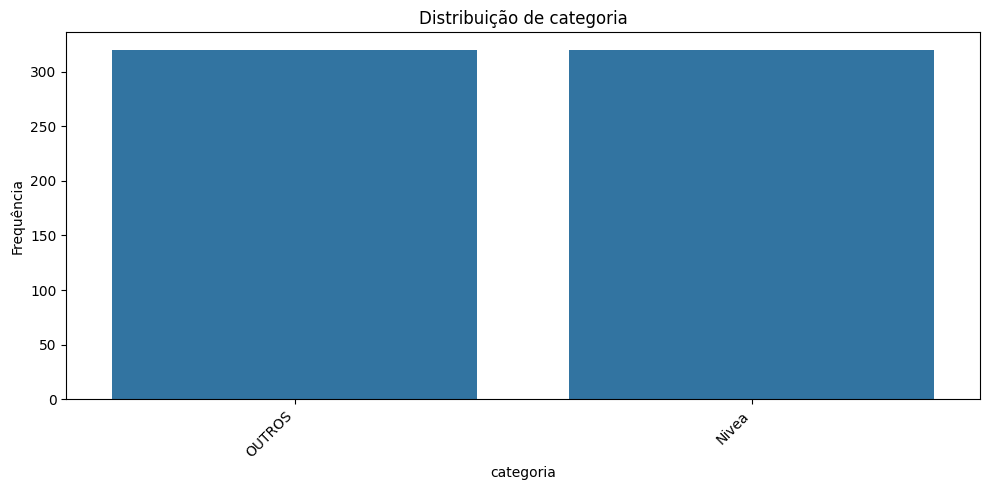

In [121]:
if tipos_colunas['categorica']:
    for col in tipos_colunas['categorica'][:min(10, len(tipos_colunas['categorica']))]:
        if df[col].nunique() > 50 or df[col].isnull().sum() > 0.5 * len(df):  # categorias demais ou mais de 50% nulos
            print(f"A coluna '{col}' possui muitas categorias ou valores nulos para uma análise.\n")
            continue

        c_vezes = df[col].value_counts().head(10)
        c_porcentagem = (c_vezes / len(df) * 100).round(2)
        print(f"Top valores da coluna '{col}' (entre {df[col].nunique()} valores diferentes)")

        c_resumo = pd.DataFrame({
            'Frequência': c_vezes,
            'Porcentagem': c_porcentagem
        })
        display(c_resumo)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c_vezes.index, y=c_vezes.values)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("Não foram identificadas variáveis categóricas no dataset.")


Agora sim está balanceado, e caso eu queira todos eles sepados como estava, eles estão salvos em ``df_sem_undersampling``

In [124]:
df_sem_undersampling['categoria'].unique()

array(['Nivea', 'SNACK', 'FRALDA', 'LIVRO', 'COMIDA', 'USO_PESSOAL',
       'LIMPEZA', 'OUTROS', 'J&J', 'WELLA', 'NATURA', 'YOPRO'],
      dtype=object)

---
**8. Datetime**

In [125]:
if tipos_colunas['datetime']:
    for col in tipos_colunas['datetime']:
        if df[col].isnull().sum()>0.5 *len(df):
            print(f"A coluna {col} possui muitos valores nulos para uma análise.")
            continue

        min_data = df[col].min()
        max_data = df[col].max()
        periodo = (max_data-min_data).days

        print(f"'{col}' vai de {min_data} até {max_data} ({periodo} dias)")

        plt.figure(figsize=(15,10))

        #Subplot da distribuicao por data
        plt.subplot(2,2,1)
        df[col].dt.date.value_count().sort_index().plot()
        plt.title(f"Distribuição ao longo do tempo")
        plt.xlabel("Data")
        plt.ylabel('Frequência')

        #Subplot da distribuicao por mes
        plt.subplot(2,2,2)
        freq_mes = df[col].dt.month.value_counts().sort_index()
        meses = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
        freq_mes.index = freq_mes.index.map(meses)
        freq_mes.plot(kind='bar')
        plt.title("Distribuição por Mês")
        plt.xlabel("Mês")
        plt.ylabel("Frequência")

        #Subplot de Distribuição por dias da Semana
        plt.subplot(2,2,3)
        freq_dias_semana = df[col].dt.dayofweek.value_counts().sort_index()
        dias = {0: 'Seg', 1: 'Ter', 2: 'Qua', 3: 'Qui', 4: 'Sex', 5: 'Sáb', 6: 'Dom'}
        freq_dias_semana.index = freq_dias_semana.index.map(dias)
        freq_dias_semana.plot(kind='bar')
        plt.title("Distribuição por Dia da Semana")
        plt.xlabel("Dia da Semana")
        plt.ylabel('Frequência')

        #Subplot de distribuição por hora caso tenha horário
        plt.subplot(2, 2, 4)
        if (df[col].dt.hour != 0).any():
            df[col].dt.hour.value_counts().sort_index().plot(kind='bar')
            plt.title('Distribuição por Hora do Dia')
            plt.xlabel('Hora')
            plt.ylabel('Frequência')
        else:
            plt.text(0.5,0.5, "Não foi encontrado o horário na coluna!", horizontalalignment='center', verticalalignment='center')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    
else:
    print("Não foram encontradas variáveis Datetime no dataset")



Não foram encontradas variáveis Datetime no dataset


---
**9. Relações entre variáveis numéricas**

In [126]:
if len(tipos_colunas['numerica']) > 1:
    correlacao = df[tipos_colunas['numerica']].corr()

    #Heatmap
    plt.figure(figsize=(12,10))
    mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  
    sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5)  
    plt.title('Correlação entre Variáveis Numéricas')  
    plt.tight_layout() 
    plt.show()

    correlacoes_fortes = []
    for i in range(len(correlacao.columns)):
        for j in range(i + 1, len(correlacao.columns)):
            valor_corr = correlacao.iloc[i, j]
            if abs(valor_corr) > 0.7:  # Limite para correlação forte
                coluna1 = correlacao.columns[i]
                coluna2 = correlacao.columns[j]
                correlacoes_fortes.append((coluna1, coluna2, valor_corr))

    for col1, col2, corr in correlacoes_fortes:
        print(f"As colunas '{col1}' e '{coluna2}' tem correlação de {corr:.2f}")

    if correlacoes_fortes:
        print("Pares fortemente correlacionados de variáveis numéricas (correlação > 0.7):\n")
        for coluna1, coluna2, valor_corr in sorted(correlacoes_fortes, key=lambda x: abs(x[2]), reverse=True):
            print(f"{coluna1} e {coluna2}: {valor_corr:.3f}")
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[coluna1], y=df[coluna2], alpha=0.6)
            plt.title(f'Gráfico de Dispersão: {coluna1} x {coluna2} (Correlação: {valor_corr:.3f})')
            plt.xlabel(coluna1)
            plt.ylabel(coluna2)
            plt.tight_layout()
            plt.show()
    else:
        print("Nenhuma correlação forte (correlação > 0.7) encontrada entre variáveis numéricas.")

else:
    print("Não foram encontradas variáveis numéricas suficiente para análise, precisa de pelo menos 2 variáveis numéricas")

Não foram encontradas variáveis numéricas suficiente para análise, precisa de pelo menos 2 variáveis numéricas


---
**10. Relações entre variáveis categoricas e numéricas**

In [127]:
from scipy import stats #para o teste ANOVA

In [128]:
if tipos_colunas['categorica'] and tipos_colunas['numerica']:
    cat_cols = tipos_colunas['categorica']
    num_cols = tipos_colunas['numerica']

    for cat_col in cat_cols:
        if df[cat_col].nunique() > 10 or df[cat_col].isnull().sum() > 0.5 * len(df):
            print(f"Pulando '{cat_col}'")
            continue
        for num_col in num_cols:
            if df[num_col].isnull().sum() > 0.5 * len(df):
                print(f"Pulando '{num_col}'")
                continue

            print(f"\nAnalisando '{cat_col}' × '{num_col}':\n")
            #Box plot para visualizar a distribuicao por categoria
            plt.figure(figsize=(12,6))

            plt.subplot(1,2,1)
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f"Distribuição de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45, ha='right')

            plt.subplot(1, 2, 2)
            medias = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
            sns.barplot(x=medias.index, y=medias.values)
            plt.title(f"Média de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(f"Média de {num_col}")
            plt.xticks(rotation=45, ha='right')

            plt.tight_layout()
            plt.show()

            #teste ANOVA
            try:
                # Obtém categorias válidas na coluna categórica, removendo valores ausentes
                categorias = df[cat_col].dropna().unique()
                if len(categorias) > 1:  # Precisa de pelo menos 2 categorias para ANOVA
                    # Agrupa os valores numéricos por categoria e remove grupos vazios
                    grupos = [df[df[cat_col] == cat][num_col].dropna() for cat in categorias]
                    grupos = [grupo for grupo in grupos if len(grupo) > 0]
                    
                    if len(grupos) > 1:  # Precisa de pelo menos 2 grupos não vazios
                        estatistica_f, p_valor = stats.f_oneway(*grupos)
                        if p_valor < 0.05:
                            print(f"✅ Relação significativa: a média de '{num_col}' varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
                        else:
                            print(f"❌ Nenhuma relação significativa: a média de '{num_col}' não varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
            except Exception as e:
                print(f"Não foi possível realizar o teste estatístico: {str(e)}")

else:
    print("É necessário ter variáveis categóricas e numéricas para esta análise")

É necessário ter variáveis categóricas e numéricas para esta análise


---
**11. Vizualizando pares de features**

In [129]:
if len(tipos_colunas['numerica']) >1:
    colunas_num = tipos_colunas['numerica'][::min(4, len(tipos_colunas['numerica']))]
    if tipos_colunas['categorica']:
        for cat_col in tipos_colunas['categorica']:
            if 2 <= df[cat_col].nunique() <= 5:
                hue_col = cat_col
                break
        else:
            hue_col = None
    else:
        hue_col = None

    print("Pair Plot de Features Numéricas Selecionadas:")
    tamanho_amostra = min(5000, len(df))
    sample_df = df.sample(tamanho_amostra) if len(df) > tamanho_amostra else df

    plt.figure(figsize=(12, 10))
    plot_df = sample_df[colunas_num].copy()

    if hue_col:
        plot_df[hue_col] = sample_df[hue_col]
        g = sns.pairplot(plot_df, hue=hue_col, corner=True, diag_kind="kde", plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle(f'Pair Plot colorido por {hue_col}', y=1.02)
    else:
        g = sns.pairplot(plot_df,corner=True,diag_kind="kde",plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle('Pair Plot de Features Numéricas Selecionadas', y=1.02)
    
    plt.tight_layout()
    plt.show()

    print("Insights do Pair Plot:\n- A diagonal mostra a distribuição de cada variável\n- Os gráficos fora da diagonal mostram as relações entre pares de variáveis\n- Observe padrões, clusters ou tendências nos scatter plots")

else:
    print("Variáveis numéricas insuficientes para análise de pair plot (é preciso pelo menos 2).")

Variáveis numéricas insuficientes para análise de pair plot (é preciso pelo menos 2).


---
**12. Pandas Profiling Report**

In [130]:
from ydata_profiling import ProfileReport

In [133]:
profile = ProfileReport(df, title='Relatório Pandas Profiling com Undersumpling', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 111.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
profile = ProfileReport(df_sem_undersampling, title='Relatório Pandas Profiling sem Undersampling', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 49.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("\n\nArquivo HTML")
profile.to_file("relatorio.html")

---
# **Testando um modelo simples**

É bom que transformamos em apenas duas categorias, pois o modelo fica simples

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [142]:
X = df[['produto']]              # input: produto
y = df['categoria']              # output: categoria

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X['produto'], y, test_size=0.3, random_state=42)

model = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Nivea       0.71      0.99      0.82        95
      OUTROS       0.98      0.60      0.74        97

    accuracy                           0.79       192
   macro avg       0.84      0.79      0.78       192
weighted avg       0.85      0.79      0.78       192

